In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style

In [27]:
df = pd.read_csv("/content/Tesla.csv+-+Tesla.csv.csv")

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [30]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [31]:
#Make two new columns which will be used for making predictions.
df["HL_Percentage"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Percentage"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [32]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]
#This line of code is selecting the last 30 elements of the dates array and storing them in a new array called dates_check. The original dates array is then modified to exclude the last 30 elements. The resulting array is stored back in the variable dates.

In [33]:
dates[:-30]

array(['6/29/2010', '6/30/2010', '7/1/2010', ..., '12/15/2016',
       '12/16/2016', '12/19/2016'], dtype=object)

In [34]:
df = df[["HL_Percentage", "CO_Percentage", "Adj Close", "Volume"]]

In [35]:
df.head()

,HL_Percentage,CO_Percentage,Adj Close,Volume
0,42.531349,25.736837,23.889999,18766300
1,30.557946,-7.599848,23.830000,17187100
2,27.873705,-12.160004,21.959999,8218800
3,23.463395,-16.521735,19.200001,5139800
4,26.342388,-19.449995,16.110001,6866900


In [36]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)
#The new column is called “PriceNextMonth”. The values in this column are calculated by shifting the values in the “Adj Close” column of the DataFrame back by 30 rows. This means that the value in each row of the “PriceNextMonth” column is the value of the “Adj Close” column 30 rows ahead.

<ipython-input-36-fc178716234d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriceNextMonth"] = df["Adj Close"].shift(-30)


In [37]:
df["Adj Close"].shift(-30)
#This code is useful if you want to create a target variable for a machine learning model that predicts stock prices. You can use the “PriceNextMonth” column as your target variable and the other columns in the DataFrame as your predictors. I hope this helps!

0       17.900000
1       17.600000
2       18.320000
3       18.780001
4       19.150000
          ...    
1687          NaN
1688          NaN
1689          NaN
1690          NaN
1691          NaN
Name: Adj Close, Length: 1692, dtype: float64

In [38]:
#This code is creating feature and label arrays for a machine learning model. The feature array is created from a Pandas DataFrame called df. The “PriceNextMonth” column is dropped from the DataFrame using the drop() function. The resulting DataFrame is converted to a NumPy array using the np.array() function. The resulting array is stored in the variable X.
X = np.array(df.drop(["PriceNextMonth"], 1))

#The next line of code scales the values in the X array using the preprocessing.scale() function from the sklearn module.

X = preprocessing.scale(X)

#The next line of code selects the last 30 rows of the X array and stores them in a new array called X_Check. The original X array is then modified to exclude the last 30 rows.

X_Check = X[-30:]
X = X[:-30]

#The next line of code drops any rows with missing values from the DataFrame stored in df.

df.dropna(inplace = True)

#The final line of code creates a NumPy array called y from the “PriceNextMonth” column of the DataFrame stored in df.

y = np.array(df["PriceNextMonth"])




<ipython-input-38-7b93ff1a1478>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"], 1))


In [39]:
#This code is dividing the feature and label arrays created in the previous code block into training and testing sets. The train_test_split() function from the sklearn.model_selection module is used to perform the split. The X and y arrays are passed to the function as arguments along with the test_size parameter, which specifies the proportion of the data that should be included in the testing set. The resulting arrays are stored in the variables X_train, X_test, y_train, and y_test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [40]:
#Define the prediction model
model = RandomForestRegressor()

In [42]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [44]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [45]:
predictions = model.predict(X_Check)

In [46]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

In [47]:
result.head()

,ClosePrice,Forecast
Date,,
6/29/2010,23.889999,NaN
6/30/2010,23.830000,NaN
7/1/2010,21.959999,NaN
7/2/2010,19.200001,NaN
7/6/2010,16.110001,NaN


Text(0, 0.5, 'Price')

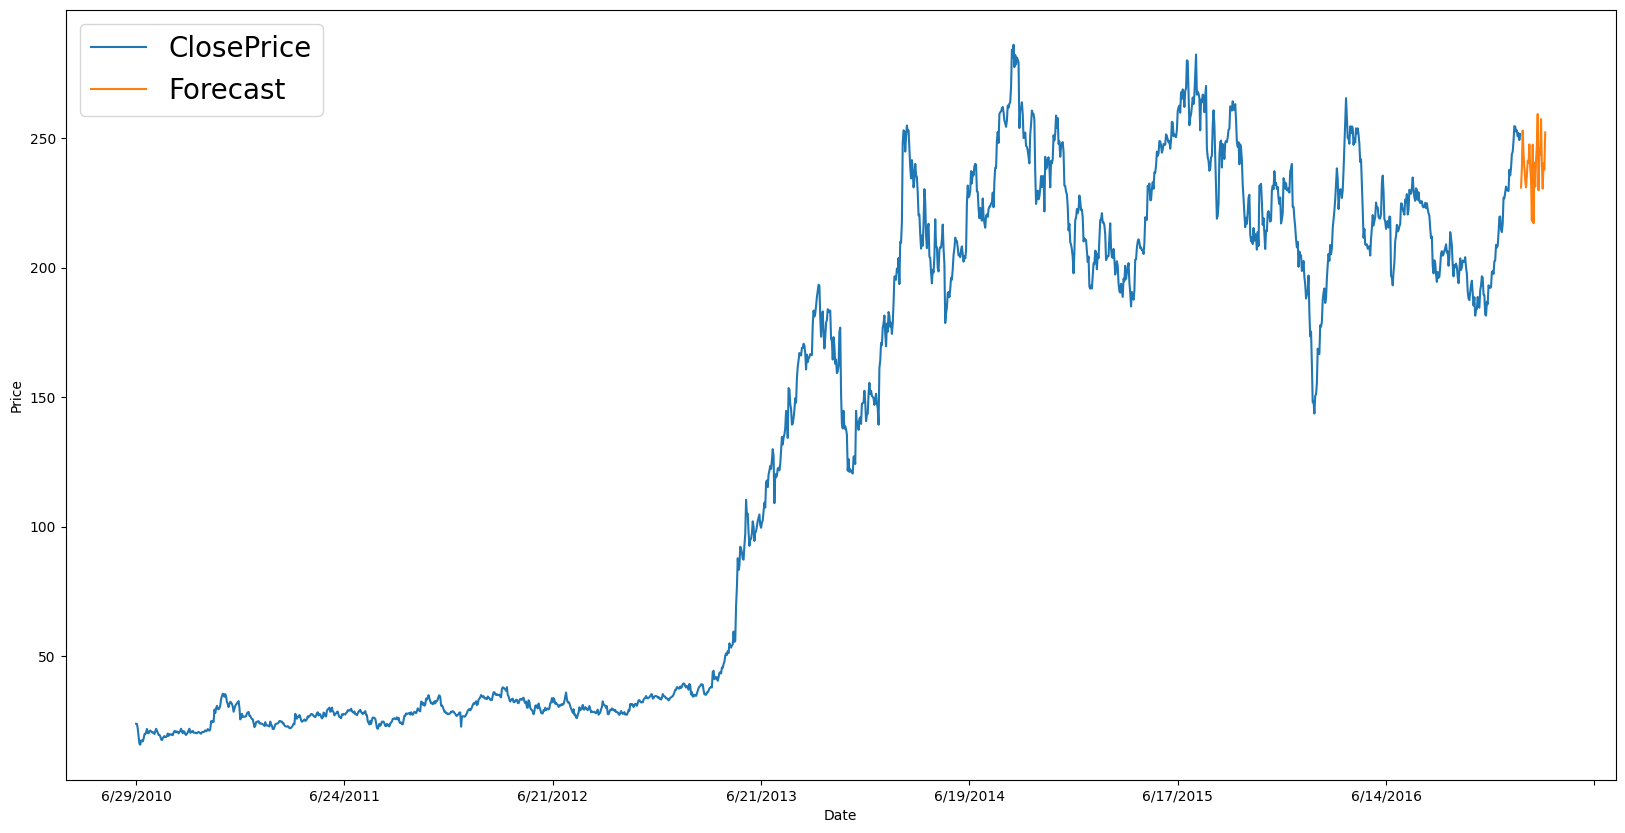

In [50]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

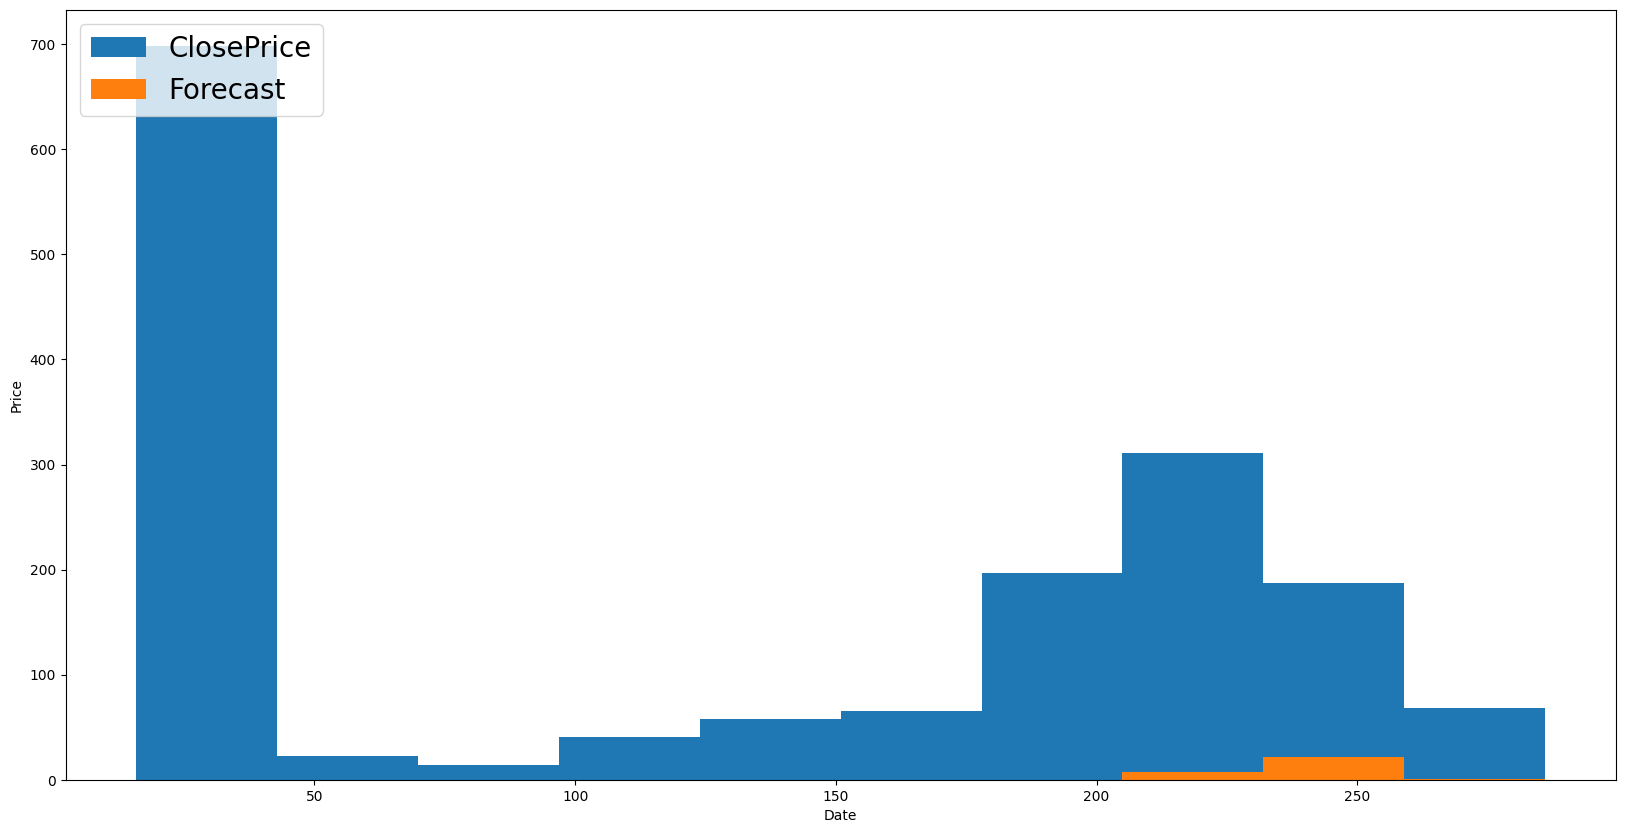

In [53]:
result.plot.hist(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()